<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/20.00.Aula-Cenario_Rio.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- O cenário de múltiplos do Pop350: parâmetros](19.00.Aula-Construindo_Cenarios_e_Pop_Multi_350_parametros.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 

---


# Cenário da cidade do Rio de Janeiro

- Continuando a criação de cenários que sejam **múltiplos** do cenário `Pop350` visto anteriormente.

- Neste segundo caderno da série, ...

In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
sns.set_style("darkgrid")

In [4]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 30/May/2020


## Carregando a matriz de distribuição populacional

In [5]:
dados = np.load('../input/landscan/landscan_rio.npy')

In [42]:
print(f'Mínimo: {dados.min()}')
print(f'Máximo: {dados.max()}')
print(f'Average: {dados.mean():.2f}')
print(f'Total: {dados.sum():.2f}')
print(f'Blocos vazios: {len(dados[dados==0])}')
print(f'Blocos negativos: {len(dados[dados<0])}')

Mínimo: -1.0
Máximo: 55124.0
Average: 2118.57
Total: 6857814.00
Blocos vazios: 1727
Blocos negativos: 39


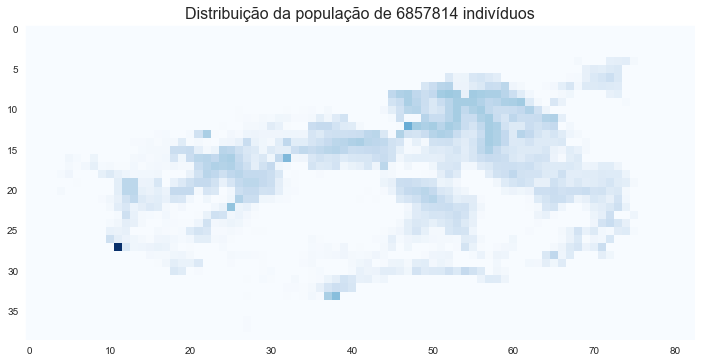

In [94]:
plt.figure(figsize=(12,6))
plt.imshow(dados, cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados.sum())} indivíduos', fontsize=16)
plt.show()

O ponto mais escuro no mapa é suspeito. Ele certamente é o bloco de valor máximo 55.124. Os blocos brancos devem estar próximos da metade, em torno de 27 mil. Vejamos os blocos que ficam acima de 20 mil:

In [47]:
print(f'Populações dos blocos com mais de 20 mil pessoas: {dados[dados>20000]}')

Populações dos blocos com mais de 20 mil pessoas: [20720. 27626. 24812. 22101. 55124. 23667.]


São apenas 6 blocos, sendo que apenas 2 têm mais de 25 mil, dentre eles o de 55.124, uma diferença enorme.

Uma busca nos revela a posição do bloco de máximo:

In [75]:
dados[27,11]

55124.0

In [77]:
dados_truncados = dados.copy()
dados_truncados[27,11] = 27000

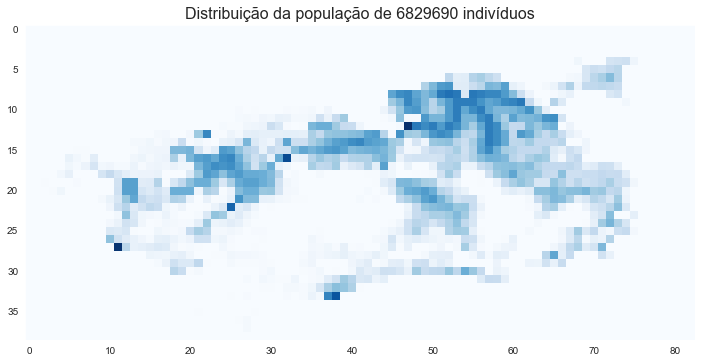

In [93]:
plt.figure(figsize=(12,6))
plt.imshow(dados_truncados, cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.title(f'Distribuição da população de {int(dados_truncados.sum())} indivíduos', fontsize=16)
plt.show()

<!--NAVIGATOR-->

---
[<- O cenário de múltiplos do Pop350: parâmetros](19.00.Aula-Construindo_Cenarios_e_Pop_Multi_350_parametros.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 